# Comparison of `batchflow` performance with `tf` and `torch`

## Models

Firstly, we comapre `torch` and `tf` versions of `VGG16`. Train them on `MNIST`.

### TensorFlow model

In [1]:
%%timeit

%run ./tf_model.py

53.5 s ± 332 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


... then restart kernel to clear GPU

### Torch model

In [1]:
%%timeit

%run ./torch_model.py

42.6 s ± 261 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


`torch` model is slightly faster.

## Research

Now let us compare `research` performances. We have the same experiment scheme and use four GPU units.

### TensorFlow model

In [15]:
import numpy as np
from multiprocessing import Process, Queue
import time
import matplotlib.pyplot as plt

import nvidia_smi

gpu_list = [2, 4, 5, 6]

def get_utilization(gpu_list):
    nvidia_smi.nvmlInit()
    handle = [nvidia_smi.nvmlDeviceGetHandleByIndex(i) for i in gpu_list]
    res = [nvidia_smi.nvmlDeviceGetUtilizationRates(item) for item in handle]
    return time.time(), [item.gpu for item in res]

def gpu_stat(gpu_list, forward, back):
    res = []
    while forward.empty():
        time.sleep(0.5)
        res.append(get_utilization(gpu_list))
    back.put(res)

def plot(res, gpu_list):
    times = np.array([item[0] for item in res])
    times = times - times[0]
    utilization = np.array([[item[1][j] for item in res] for j in range(len(gpu_list))])
    plt.figure(figsize=(15, 3))
    _ = [plt.plot(times, utilization[i]) for i in range(len(gpu_list))]
    plt.xlim(0, 160)
    plt.show()

In [2]:
forward = Queue()
back = Queue()

p = Process(target=gpu_stat, args=(gpu_list, forward, back))
p.start()

In [3]:
%%timeit

%run ./tf_research.py 4

Research my_research is starting...
Research my_research_1 is starting...
Research my_research_2 is starting...
Research my_research_3 is starting...
Research my_research_4 is starting...
Research my_research_5 is starting...
Research my_research_6 is starting...
Research my_research_7 is starting...
2min 21s ± 932 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


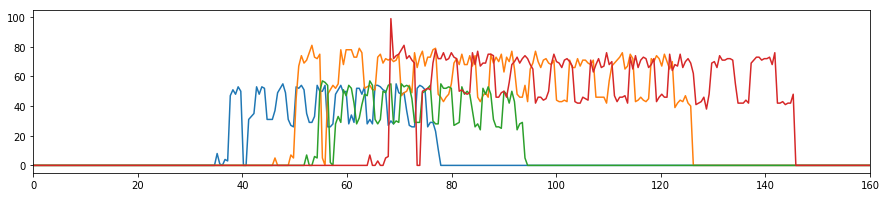

In [4]:
forward.put('stop')
tf_res = back.get()
plot(tf_res, gpu_list)

In [5]:
forward = Queue()
back = Queue()

p = Process(target=gpu_stat, args=([2], forward, back))
p.start()

In [6]:
%%timeit

%run ./tf_research.py 1

Research my_research_8 is starting...
Research my_research_10 is starting...
Research my_research_11 is starting...
Research my_research_13 is starting...
Research my_research_14 is starting...
Research my_research_15 is starting...
5min 47s ± 1.13 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


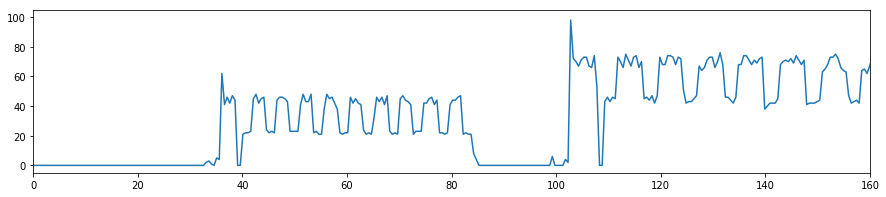

In [10]:
#forward.put('stop')
#tf_res = back.get()
plot(tf_res, [2])

### Torch model

In [11]:
forward = Queue()
back = Queue()

p = Process(target=gpu_stat, args=(gpu_list, forward, back))
p.start()

In [12]:
%%timeit

%run ./torch_research.py 4

Research my_research_16 is starting...
Research my_research_17 is starting...
Research my_research_18 is starting...
Research my_research_19 is starting...
Research my_research_20 is starting...
Research my_research_21 is starting...
Research my_research_22 is starting...
Research my_research_23 is starting...
2min 17s ± 1.36 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


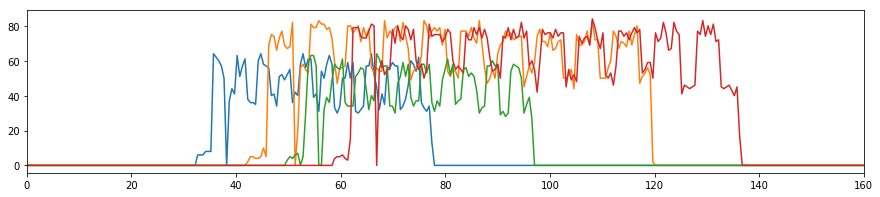

In [16]:
forward.put('stop')
torch_res = back.get()
plot(torch_res, gpu_list)

In [17]:
forward = Queue()
back = Queue()

p = Process(target=gpu_stat, args=([2], forward, back))
p.start()

In [18]:
%%timeit

%run ./torch_research.py 1

Research my_research_24 is starting...
Research my_research_25 is starting...
Research my_research_26 is starting...
Research my_research_27 is starting...
Research my_research_28 is starting...
Research my_research_29 is starting...
Research my_research_30 is starting...
Research my_research_31 is starting...
5min 43s ± 1.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


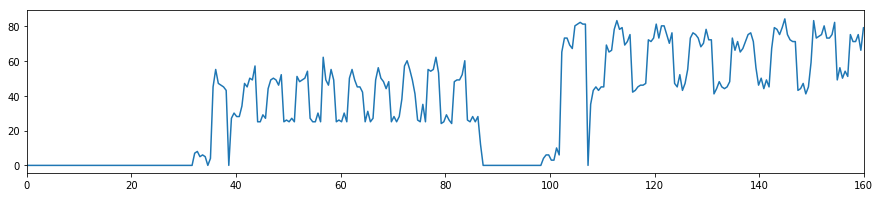

In [19]:
forward.put('stop')
torch_res = back.get()
plot(torch_res, [2])